# Linear Regression from Scratch using California Housing Dataset

In this notebook, we will implement linear regression using the California Housing dataset. The goal is to predict the price of houses in California based on various features such as median income, house age, average number of rooms, population, and location (latitude, longitude).

## Dataset Introduction
The California Housing dataset consists of 20,640 samples and 8 feature variables. The target variable is the median house value in hundreds of thousands of dollars. This dataset was collected from the 1990 California census and has been widely used for regression tasks.

We will follow these steps:
1. Load and visualize the data.
2. Implement linear regression using gradient descent from scratch.
3. Train and evaluate the model using mean squared error (MSE).


## Dataset Overview

The California Housing dataset contains the following features:

- **MedInc**: Median income in block group
- **HouseAge**: Median house age in block group
- **AveRooms**: Average number of rooms per household
- **AveBedrms**: Average number of bedrooms per household
- **Population**: Block group population
- **AveOccup**: Average number of household members
- **Latitude**: Block group latitude
- **Longitude**: Block group longitude

Our target variable is **PRICE**, which represents the median house price (in hundreds of thousands of dollars) in a given district.


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.DataFrame(housing.target, columns=['PRICE'])

# Display the first few rows of the dataset
X.head()
# y.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


## Splitting Data into Training and Testing Sets

In machine learning, it’s important to evaluate the model on unseen data. We manually **split** the dataset into **training set**  and **test sets**. The training set will be used to train the model, while the testing set will be used to evaluate its performance.

We shuffle the dataset randomly and use 80% of the data for training and 20% for testing.

In [ ]:
def manual_train_test_split(X, y, test_size=0.2):
    # Get the number of data points
    num_data_points = X.shape[0]

    # Generate shuffled indices
    shuffled_indices = np.random.permutation(num_data_points)

    # Calculate the number of test samples
    test_set_size = int(num_data_points * test_size)

    # Split indices into test and train
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]

    # Use the indices to split the data
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

    return X_train, X_test, y_train, y_test

# Perform the manual train-test split
X_train, X_test, y_train, y_test = manual_train_test_split(X, y, test_size=0.2)

## Add the Intercept Term

### Explanation:

To include an intercept (bias term) in our model, we need to add a column of ones to the feature matrix $ X $. This ensures that the model can learn both the coefficients and the intercept.

In [ ]:
# Add a column of ones to X for the intercept term
X_train_intercept = np.column_stack([np.ones(X_train.shape[0]), X_train])
X_test_intercept = np.column_stack([np.ones(X_test.shape[0]), X_test])

## Compute the Normal Equation

### Explanation:

Now we compute the regression coefficients $ \theta $ using the **normal equation**. The normal equation is:
$$
\theta = (X^T X)^{-1} X^T y
$$
Where:

- $ X^T X $ is the dot product of the transpose of $ X $ and $ X $.
- $ (X^T X)^{-1} $ is the inverse of that product.
- $ X^T y $ is the dot product of the transpose of $ X $ and the target vector $ y $.

In [ ]:
# Compute the normal equation: theta = (X^T X)^(-1) X^T y
XtX = np.dot(X_train_intercept.T, X_train_intercept)  # X^T * X
XtX_inv = np.linalg.inv(XtX)              # (X^T * X)^(-1)
XtY = np.dot(X_train_intercept.T, y_train)            # X^T * y

# Compute the coefficients (theta)
theta = np.dot(XtX_inv, XtY)

## Make Predictions

### Explanation:

Now that we have the coefficients $ \theta $, we can use them to make predictions on the training data. The predicted values $ \hat{y} $ are calculated as:
$$
\hat{y} = X \theta
$$
Where $ X $ is the matrix of input features (including the intercept term).

In [ ]:
# Make predictions on the training data
y_pred_test  = np.dot(X_test_intercept, theta)

## Evaluate the Model

### Explanation:

We can evaluate the model using **Mean Squared Error (MSE)** and an "accuracy-like" measure by calculating how many predictions fall within a certain error margin (threshold) of the true values.

In [ ]:
# Mean Squared Error (MSE)
mse = np.mean((y_pred_test  - y_test) ** 2)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.5212586583728862


# Applying Linear Regression by Stochastic Gradient Descent

## Data Standardization

Calculate the mean and standard deviation for each feature from the training set.
Use the training set's mean and standard deviation to standardize both the training and test sets.

### Formula for standardization:

$$
X_{\text{scaled}} = \frac{X - \mu}{\sigma}
$$

Where:
- $X$ is the original data.
- $\mu$ is the mean of each feature in the training set.
- $\sigma$ is the standard deviation of each feature in the training set.

In [ ]:
def standardize(X_train, X_test):
    # Calculate the mean and standard deviation of the training set
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)

    # To prevent division by zero, set std=1 where std is zero
    std[std == 0] = 1

    # Standardize the training set
    X_train_scaled = (X_train - mean) / std

    # Use the training set's mean and std to standardize the test set
    X_test_scaled = (X_test - mean) / std

    return X_train_scaled, X_test_scaled

In [ ]:
# Standardize both the training and test sets
X_train_scaled, X_test_scaled = standardize(X_train.values, X_test.values)

In [ ]:
# Add intercept term to the standardized data
X_train_intercept_scaled = np.column_stack([np.ones(X_train_scaled.shape[0]), X_train_scaled])
X_test_intercept_scaled = np.column_stack([np.ones(X_test_scaled.shape[0]), X_test_scaled])

## Steps to Implement
1. **Initialize the parameters** $ \theta $ (weights and bias).
2. **In each iteration**, compute the predicted values $ \hat{y} $ and update the parameters based on the gradient of the loss function.
3. **Repeat** for multiple iterations until the parameters converge (i.e., when the updates become very small).

### Formula for Updating Weights:

The weight update formula for stochastic gradient descent is:

$$
\theta_j := \theta_j - \alpha \cdot \frac{2}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)}
$$

Where:
- $ \alpha $ is the learning rate.
- $ m $ is the number of samples.
- $ h_{\theta}(x^{(i)}) $ is the predicted value for the $i$-th sample.

This formula updates each weight $ \theta_j $ by taking a step in the direction opposite to the gradient, scaled by the learning rate $ \alpha $. The update is based on the error between the predicted value $ h_{\theta}(x^{(i)}) $ and the actual target $ y^{(i)} $, multiplied by the corresponding feature value $ x_j^{(i)} $.

In [ ]:
# SGD implementation
def sgd(X, y, learning_rate=0.01, n_iterations=1000):
    m, n = X.shape
    theta = np.random.randn(n, 1)  # Initialize theta with random values
    y = y.values.reshape(-1, 1)    # Reshape y to be a column vector
    mse_history = []  # List to store MSE values over iterations

    for iteration in range(n_iterations):
        for i in range(m):
            random_index = np.random.randint(m)
            Xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * Xi.T.dot(Xi.dot(theta) - yi)
            theta = theta - learning_rate * gradients

        # Store MSE for every iteration
        mse = np.mean((X.dot(theta) - y) ** 2)
        mse_history.append(mse)

        if iteration % 100 == 0 and iteration != 0:
            print(f"Iteration {iteration}: MSE = {mse}")

    return theta, mse_history

In [ ]:
# Train the model using SGD
theta_sgd, mse_history = sgd(X_train_intercept_scaled, y_train, learning_rate=0.00001, n_iterations=100)

## Make Predictions

In [ ]:
# Make predictions on the test data
y_pred_sgd = np.dot(X_test_intercept_scaled, theta_sgd)

## Evaluate the Model

In [ ]:
# Mean Squared Error (MSE)
mse_sgd = np.mean((y_pred_sgd - y_test.values) ** 2)
print(f"SGD Mean Squared Error: {mse_sgd}")

SGD Mean Squared Error: 0.5215074278088058


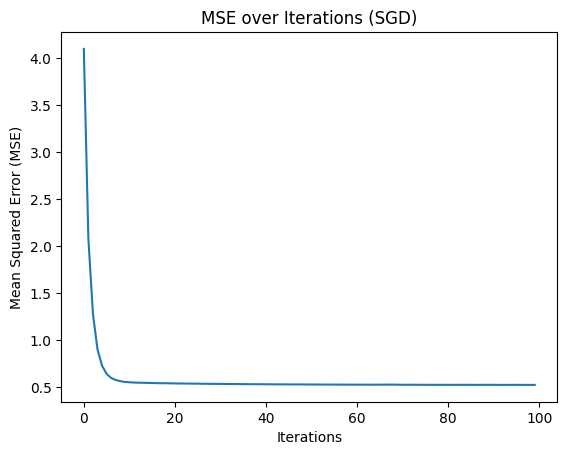

In [ ]:
# Plot MSE over iterations
plt.plot(mse_history)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE over Iterations (SGD)')
plt.show()

# Directly Use the sklearn Library

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train_intercept, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_intercept)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) on Test Data: {mse}")


Mean Squared Error (MSE) on Test Data: 0.5212586583727541
